In [6]:
import pandas as pd
import numpy as np

from google.colab import files
abrir=files.upload()

Saving wines.txt to wines.txt


In [7]:
# A continuación vamos a observar la información disponible en nuestra BBDD para realizar el respectivo analisis
wines=pd.read_csv('wines.txt', sep='\t')
wines.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type of wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [8]:
# Para saber cuanta información podemos eliminar o reemplazar segun la cantidad de N/A, 
#es necesario validar la cantidad de datos que tenemos de las colummnas de mayor relevancia como lo es el tipo de vino para.
from pandas.core.arrays.interval import value_counts
wines['type of wine'].value_counts()

white    4898
red      1599
Name: type of wine, dtype: int64

In [9]:
# El siguiente recuadro, nos permite ver los principales indicadores estadisticos de la descripción de los vinos donde se puede evidenciar que la media está alejada 
# de la desvación estandar, es decir que los datos no están muy dispersos.
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,1.710882,3.218501,0.531268,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,7.636088,0.160787,0.148806,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,103.898000,4.010000,2.000000,9.000000


In [10]:
#Revisaresmos la cantidad de datos completos para saber como proceder en el reeplazo de los datos, sin embargo podemos observar que todos los datos tienen información
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   object 
 11  quality               6497 non-null   int64  
 12  type of wine          6497 non-null   object 
dtypes: float64(10), int64(1), object(2)
memory usage: 660.0+ KB


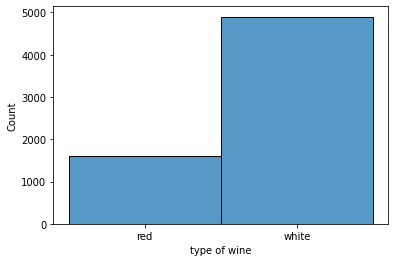

In [11]:
# A continuación observacmos que el tipo de vino mas frecuente es el vino blan
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(x='type of wine', data=wines, )
plt.show()

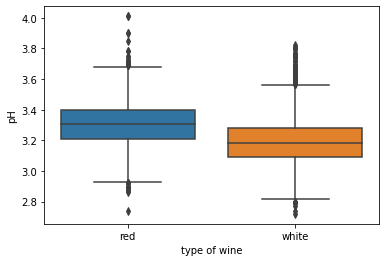

In [17]:
# La siguiente información nos indica que el vino rojo a pesar de tener menor participación, es quien tiene mas ph, es decir que tiene una mayor acidez
sns.boxplot(x="type of wine",y="pH", data=wines, )
plt.show()

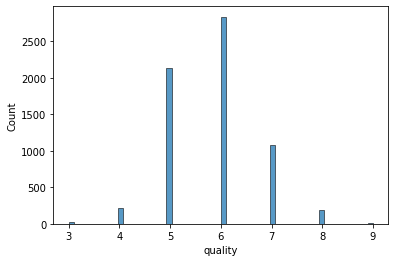

In [18]:
# En la siguiente imagen podemos observar que la calidad de los vinos superan una calificación promedio de 6, es decir que está dentro 60% de la calidad del vino
sns.histplot(x='quality', data=wines, )
plt.show()

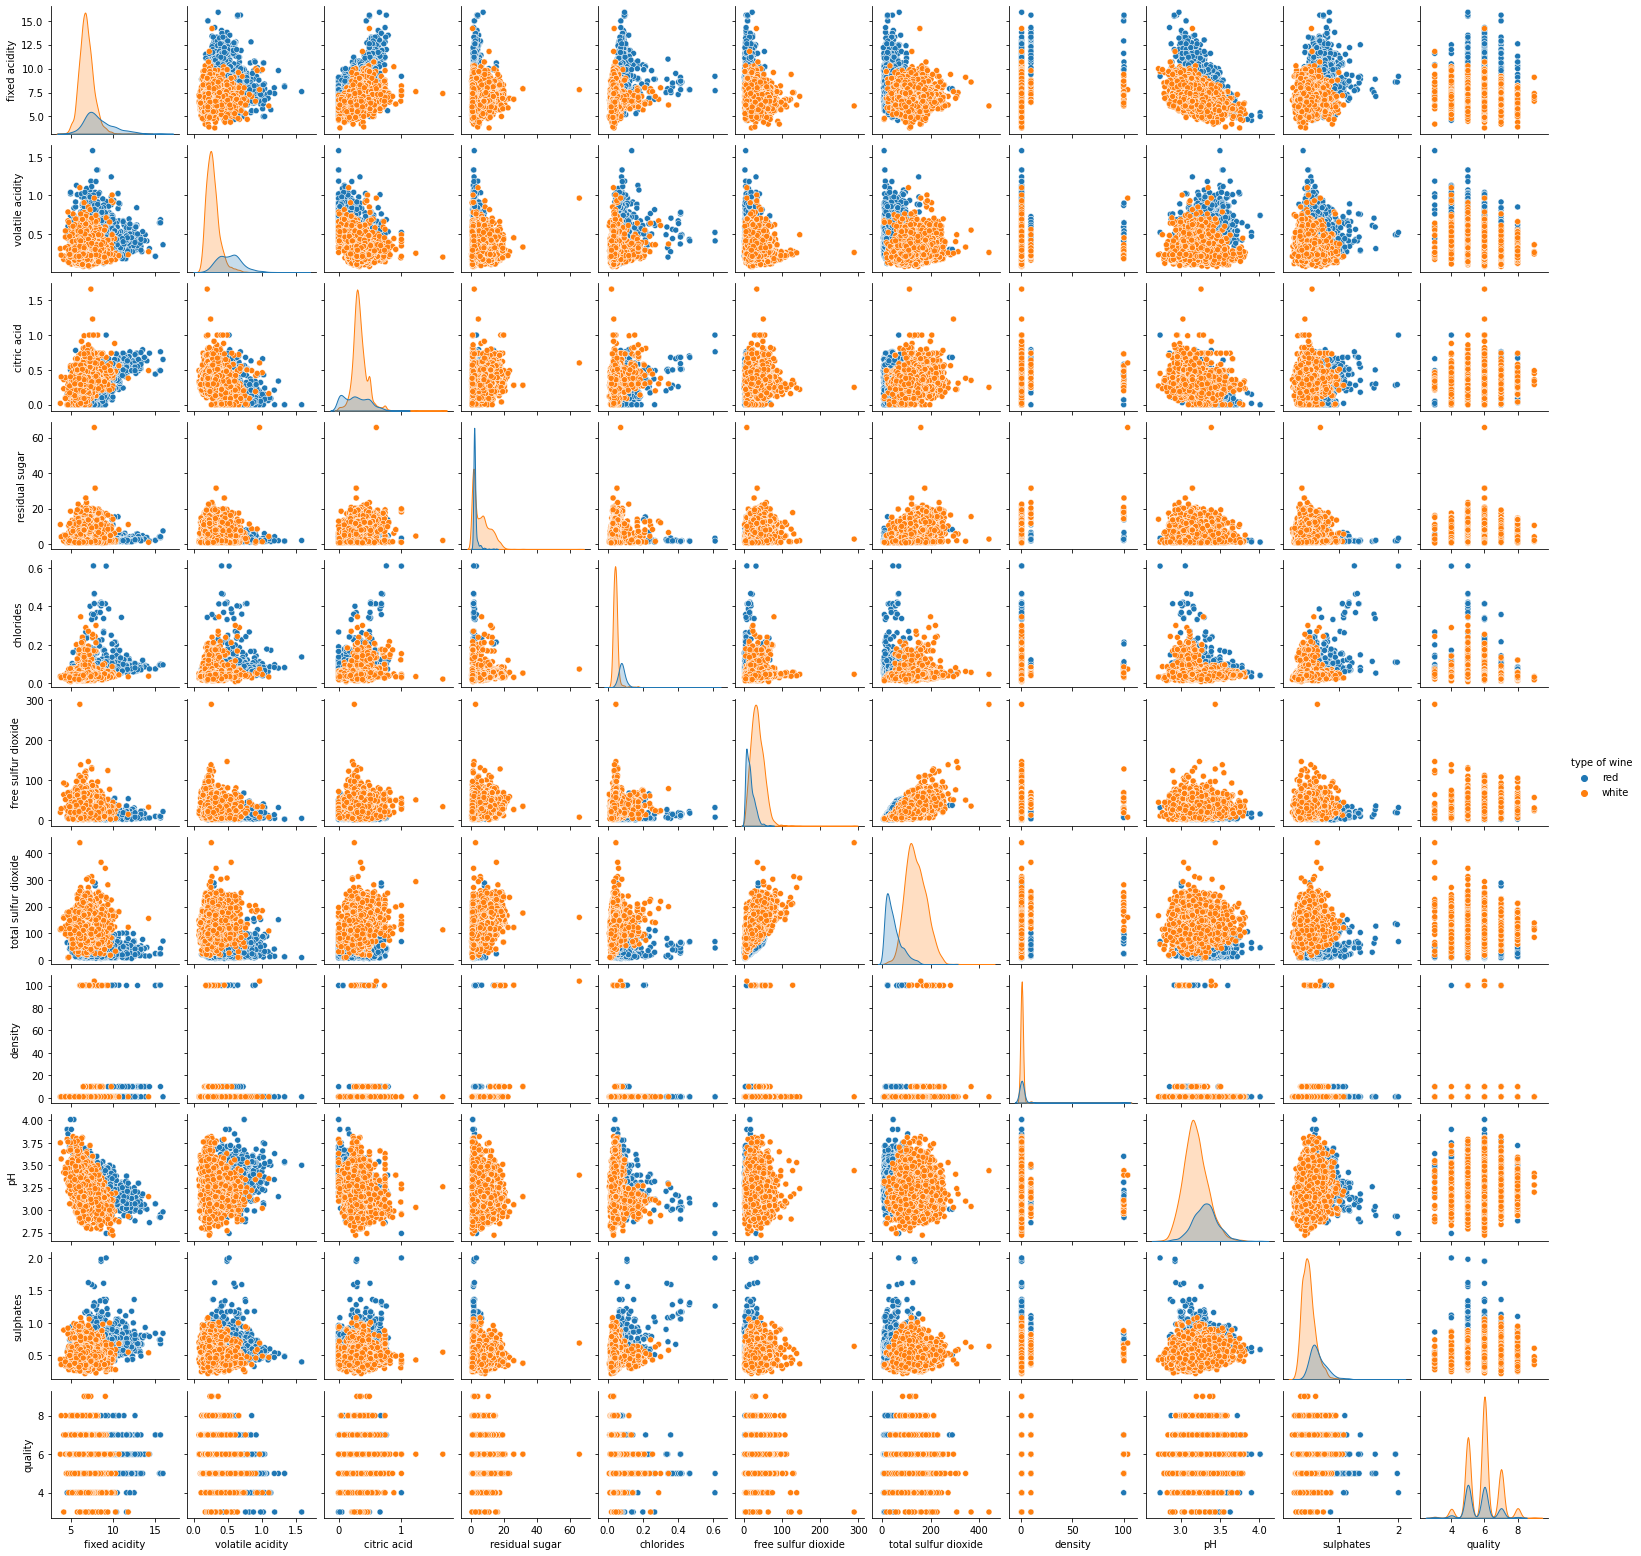

In [21]:
#Sumado lo anterior,  acontinuación podemos observacar las caracteristicas de los wines graficamente
sns.pairplot(wines, hue='type of wine', height=2)